# Spam Mail Filtering using multiple ML algorithms

### This notebook will able to differenciate between Ham and Spam mails.
### To start this project we need some important library and required data.

#### Importing a bunch of libraries

In [1]:
!pip install nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score,accuracy_score

#### To remove unwanted word from our data we need to download stopword from nltk library

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Mighty
[nltk_data]     Eagle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Data Loading

#### To begin with, we have imported our required data

In [4]:
#read data in CSV format according to your PC's address
raw_data = pd.read_csv("spam1.csv")

### Data PreProcessing

In [5]:
raw_data.shape

(5171, 4)

In [6]:
raw_data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [7]:
len(raw_data[raw_data.label == 'ham'])

3672

In [8]:
i = [1,2,3,4,5,6]
i[0]

1

In [9]:
dict1 = {"Class":raw_data.label, "Text":raw_data.text}           # extracting Class and Text label from original dataset
data = pd.DataFrame(dict1)       

In [10]:
data.head(10)

,Class,Text
0,ham,Subject: enron methanol ; meter # : 988291\nth...
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a..."
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\nthis deal is to ...
5,ham,Subject: ehronline web address change\nthis me...
6,ham,Subject: spring savings certificate - take 30 ...
7,spam,Subject: looking for medication ? we ` re the ...
8,ham,Subject: noms / actual flow for 2 / 26\nwe agr...
9,ham,"Subject: nominations for oct . 21 - 23 , 2000\..."


In [11]:
data['numClass'] = data['Class'].map({'ham':0, 'spam':1}) # converting all the ham and spam values to 1 and 0 respectively

# Unique values in target set
print("Unique values in the Class set: ", data.Class.unique())

Unique values in the Class set:  ['ham' 'spam']


In [12]:
data.head()

,Class,Text,numClass
0,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\nthis deal is to ...,0


In [13]:
#Removing stopwords of English
stopset = set(stopwords.words("english"))
print(list(stopset))             # List of stopwords as per nltk library

['that', "he'd", 'me', 'the', 'each', "isn't", "doesn't", "hasn't", 'it', 'at', 'd', "they'll", "you've", "we're", 'a', 'her', 'our', 'having', 'while', 'he', 'by', 'too', 'on', "i'm", "needn't", 'all', 'y', 'not', 'should', 'its', 'just', 'myself', 'now', "wasn't", "we've", 'why', 'which', 'haven', 'up', 'over', 'herself', 'were', 'needn', 'isn', 'about', 'mustn', 'm', 'only', 'my', 'for', 'ours', 'these', 'from', "it's", 'or', 'an', 'of', 'during', 'hers', 'than', 'yourselves', "couldn't", 'have', 'o', "she'd", 'be', "you'll", 'under', "he'll", 'between', 'down', 'this', 'those', 'before', 'but', "you're", "shouldn't", 'do', 'you', "she's", 'here', 'itself', 'ourselves', 'doing', 'i', "i'd", 'ain', 'nor', "shan't", 'they', 'hasn', "that'll", 'don', 'any', 'theirs', 'into', 'no', 'won', "should've", 'most', 'his', 'who', 'doesn', 's', "we'll", 'out', 'there', 'will', 'being', 'both', 'wouldn', 'am', "we'd", 'wasn', 'whom', 'shouldn', "weren't", "didn't", "hadn't", "i'll", 'aren', "the

In [14]:
data.isnull().sum()   # checking for nnull value

Class       0
Text        0
numClass    0
dtype: int64

In [15]:
data.dropna(inplace=True)            # droppinf of null value if present
data.isnull().sum()

Class       0
Text        0
numClass    0
dtype: int64

In [16]:
# # printing number of ham and spam messages in the dataset

# ham  = data[data.numClass == 0]
# print("Number of ham messages in data set:", ham['Class'].count())

# spam = data[data.numClass == 1]
# print("Number of spam messages in data set:", spam['Class'].count())

ham = data[data.numClass == 0]
print("Number of ham messages in data set:", len(ham))

spam = data[data.numClass == 1]
print("Number of spam messages in data set:", len(spam))

Number of ham messages in data set: 3672
Number of spam messages in data set: 1499


### Initializing CountVectorizer

#### It will take the word count from every mail's text and make a matrix of it as we cannot train our ML model on Textual data. This matrix will help ML algorithm to predict which is spamand which is not.

In [17]:
#Initialising Count Vectorizer
vectorizer = CountVectorizer(stop_words=stopset,binary=True)
vectorizer = CountVectorizer()


In [ ]:
count_matrix

<5171x50447 sparse matrix of type '<class 'numpy.int64'>'
	with 456145 stored elements in Compressed Sparse Row format>

### Splitting of data into Training and Testing part

In [20]:
    
X = vectorizer.fit_transform(data.Text)
# Extract target column 'Class'
y = data.numClass

#Performing test train Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, train_size=0.85, random_state=42)

# Show the results of the split
print("\n")
# print("Training set has {} samples.".format(X_train.shape[0]))
# print("Testing set has {} samples.".format(X_test.shape[0]))

print(f"Training set has {X_train.shape[0]} samples.")
print("Testing set has {} samples.".format(X_test.shape[0]))
print("\n")



Training set has 4395 samples.
Testing set has 776 samples.




In [21]:
# a = 1
# b = 2
# c = 3
# d = 4

a, b, c, d = [1, 2, 3, 4]
print(a, b, c, d)

1 2 3 4


In [22]:
data.numClass

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: numClass, Length: 5171, dtype: int64

In [23]:
data[(data['Class'] == 'spam')]['Class'].count()

np.int64(1499)

In [24]:
data[data["Class"] == 'spam']["Class"].count()

np.int64(1499)

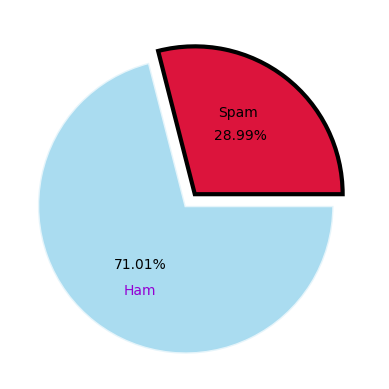

In [25]:
# plt.pie([data[(data['Class'] == 'spam')]['Class'].count(), data[(data['Class'] == 'ham')]['Class'].count()], 
#         autopct='%0.2f%%', labels=['Spam', "Ham"], 
#         pctdistance = 0.5, wedgeprops = {'linewidth': 2, "edgecolor" : "black"}, explode=[0, 0.1])

wedges, labels, percentages = plt.pie(
    [data[(data['Class'] == 'spam')]['Class'].count(), data[(data['Class'] == 'ham')]['Class'].count()],
    autopct='%0.2f%%',
    labels=['Spam', "Ham"],
    pctdistance=0.5,
    wedgeprops={'linewidth': 2, "edgecolor": "white"},
    explode=[0, 0.1]
)

# print(labels)

labels[0].set_position((0.16, 0.55))      # Move 'Spam' label to (x=1.3, y=0.6)
labels[0].set_color('black')

wedges[0].set_animated(True)

wedges[0].set_facecolor('crimson')
wedges[0].set_edgecolor('black')
wedges[0].set_linewidth(3)
# wedges[0].set_hatch('') # Apply a diagonal hatch pattern

# --- Customize the 'Ham' wedge (index 1) ---

wedges[1].set_facecolor('skyblue')
wedges[1].set_alpha(0.7) # Make it 70% transparent
wedges[1].set_edgecolor('white')
wedges[1].set_linewidth(2)

# percentages[0].set_position((0.8, 0.35)) # Move '10.00%' text

# Set position for the 'Ham' label and its percentage
labels[1].set_position((-0.26, -0.65))    # Move 'Ham' label to (x=-1.4, y=-0.5)
labels[1].set_color('darkviolet')
# percentages[1].set_position((-0.7, -0.2)) # Move '90.00%' text

plt.show()     # Makes a Pie Chart

### Defining function to train and predict labels from classifier

In [26]:
objects = ('Multi-NB','SVM','KNN', 'RF', 'AdaBoost')

def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)

# function to predict features 
def predict_labels(clf, features):     # X_test
    return(clf.predict(features))

### Defining ML models to different variable

In [31]:
# Initialize the five models
A = MultinomialNB(alpha=1.0,fit_prior=True)
B = LinearSVC()
C = KNeighborsClassifier(n_neighbors=3)
D = RandomForestClassifier(n_estimators=10, random_state=42)
E = AdaBoostClassifier(n_estimators=10)


### Finding Performance Matrics to find efficiency of all the ML models

In [32]:
clf = [A,B,C,D,E]
acc_score = [0,0,0,0,0]

# finding the performance score of each model
for a in range(5):
    print(objects[a])
    train_classifier(clf[a], X_train, y_train)
    y_pred = predict_labels(clf[a],X_test)
    pred_val = f1_score(y_test, y_pred)
    acc_score[a]=accuracy_score(y_test, y_pred)
    print("Accuracy in %:")
    print(acc_score[a]*100)
    print("F1 Score")
    print(pred_val)
    print("\n")


Multi-NB
Accuracy in %:
97.68041237113401
F1 Score
0.96


SVM


c:\Users\Mighty Eagle\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy in %:
97.0360824742268
F1 Score
0.9483146067415731


KNN
Accuracy in %:
86.46907216494846
F1 Score
0.7852760736196319


RF
Accuracy in %:
94.58762886597938
F1 Score
0.9004739336492891


AdaBoost
Accuracy in %:
81.95876288659794
F1 Score
0.573170731707317




### Bar chart to visualize Accuracy of every model

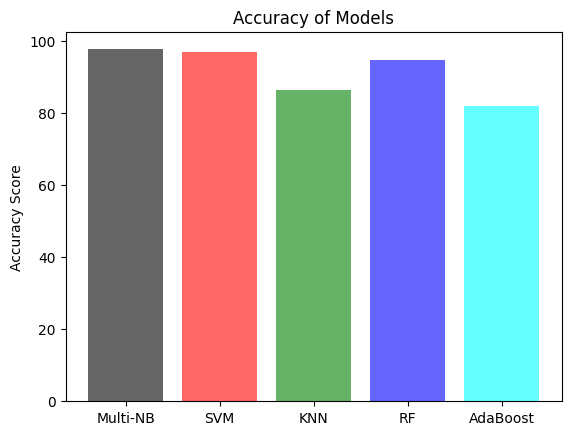

In [59]:
# x_pos = np.arange(len(objects))
# y_pos = [x*100 for x in acc_score]
# plt.bar(x_pos,y_pos, align='center', alpha=0.7, color=['black', 'red', 'green', 'blue', 'cyan'])
# plt.xticks(x_pos, objects)
# plt.ylabel('Accuracy Score')
# plt.title('Accuracy of Models')
# plt.show()

x_pos = np.arange(len(objects))
y_pos = [x*100 for x in acc_score]

plt.bar(x_pos,y_pos, align='center', alpha=0.6, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xticks(x_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()

In [41]:
acc_score

[0.9768041237113402,
 0.970360824742268,
 0.8646907216494846,
 0.9458762886597938,
 0.8195876288659794]